# Marketing Analytics

## Introduction 

Finding out the RFM of a customer. this can be used for calculating\
Assigning loyalty levels for customers\
Customer live time value analysis 

Dataset Info:
This is a customer orders database, part of the superstore data in Tableau. it contains orders occurring between 2014-01-03 and 2017-12-30.

Attribute Information:
Row ID:
Order ID:       Unique identify of an order. 
Order Date:     Order Date. Numeric, the day when each transaction was generated.
Ship Date:      Order Date. Numeric, the day when each shipment was made.
Ship Mode:      Method of shipment selected by the user
Customer ID:    Customer number. Nominal, an alphanumeric ID uniquely assigned to each customer.
Customer Name:  Nominal, the First and Last name of each customer.
Segment:        Customer Segment classification
Country:        Country name. Nominal, the name of the country where each customer resides.
City:           City name. Nominal, the name of the city where each customer resides.
Postal Code:    Postal code according to the address of the customer.
Region:         Geographic Region, of the country or state.
Product ID:     Unique id for the product sold 
Category:       Product category classification
Sub-Category:   A subcategory of the product category
Product Name:   Nominal, a name of the product.
Sales:          Sales Amount: the value of the product sold



In this article, I will walk you through the proces sof RFM modelling. The make seegmentation based on transactional behaviour.  

## Data Preprocessing

In [7]:
#import the necessary libraries
import pandas as pd
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
#read the data uisng pandas 
df = pd.read_excel('SStore_data.xls')
print("Total number of transactions happened in the given period: "+ str(df.shape[0]))
#visualize the data for clarity
df.head(4)


Total number of transactions happened in the given period: 9994


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [9]:
#taking data that have price above 0
data= df[df['Sales'] > 0]
print("Total number of possitive transactions happened in the same period: "+ str(df.shape[0]))
df.describe()


Total number of possitive transactions happened in the same period: 9994


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
# Explore the data set by Printing the details of the dataset
maxdate = df['Order Date'].dt.date.max()
mindate = df['Order Date'].dt.date.min()
unique_cust = df['Customer ID'].nunique()
tot_quantity = df['Quantity'].sum()
tot_sales = df['Sales'].sum()


print(f"The Time range of transactions is: {mindate} to {maxdate}")
print(f"Total number of unique customers: {unique_cust}")
print(f"Total Quantity Sold: {tot_quantity}")
print(f"Total Sales for the period: ${tot_sales})")

The Time range of transactions is: 2014-01-03 to 2017-12-30
Total number of unique customers: 793
Total Quantity Sold: 37873
Total Sales for the period: $2297200.8603000003)


## Data Exploration

It is always advised that before Modeling, it is always important to explore what data we have data. The reasons are \
°Helps us to understand the data of the business better.\
°Helps us to understand the business better.\
°Helps us validate the hypothesis.

Some of the hypotheses are:\
Most buyers are from the USA. \
The corporate buy more than any other segment\
Most used shipping is Standard class\
The west region purchase better than another region

Exploratory data analysis also helps us to answer questions such as:\
What is the trend of transactions for the given period?

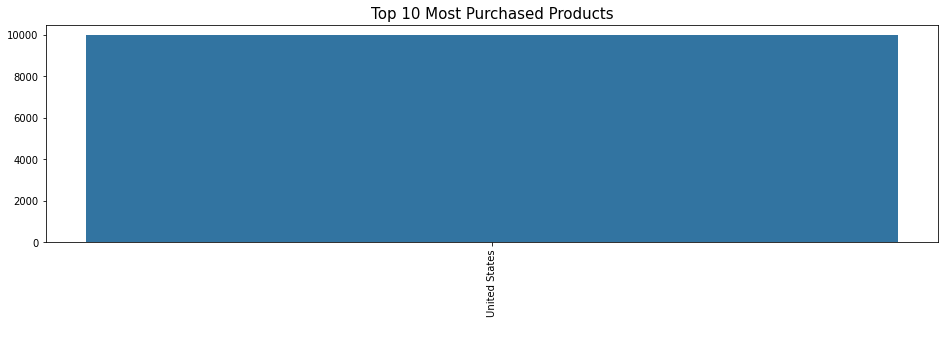

In [11]:
# The most country to purchase from the website
top_purchase = data.groupby('Country')['Sales'].count().sort_values(ascending=False)[:10]

plt.figure(figsize=(16,4))
sns.barplot(x=top_purchase.index, y=top_purchase.values)
plt.xticks(rotation=90)
plt.title("Top 10 Most Purchased Products", size=15)
plt.xlabel(" ")
plt.show()

This is a validation that proves 100% of the customers are from the states.

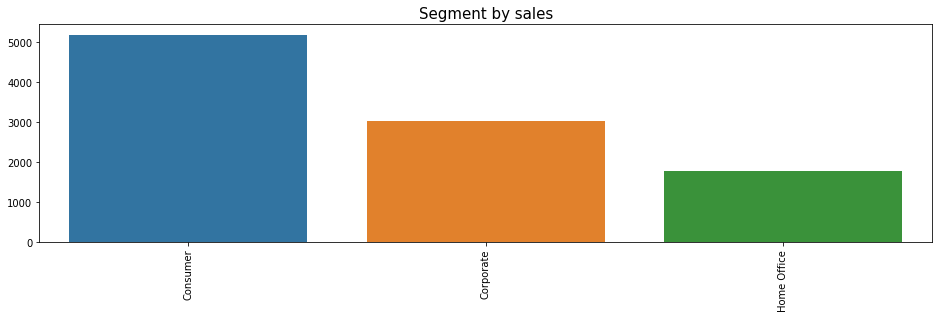

In [12]:
# The most segment to purchase from the website
top_purchase = data.groupby('Segment')['Sales'].count().sort_values(ascending=False)[:10]

plt.figure(figsize=(16,4))
sns.barplot(x=top_purchase.index, y=top_purchase.values)
plt.xticks(rotation=90)
plt.title("Segment by sales", size=15)
plt.xlabel(" ")
plt.show()

This unvalidate the hypothesis that speculates the corporate segment is the biggest. 

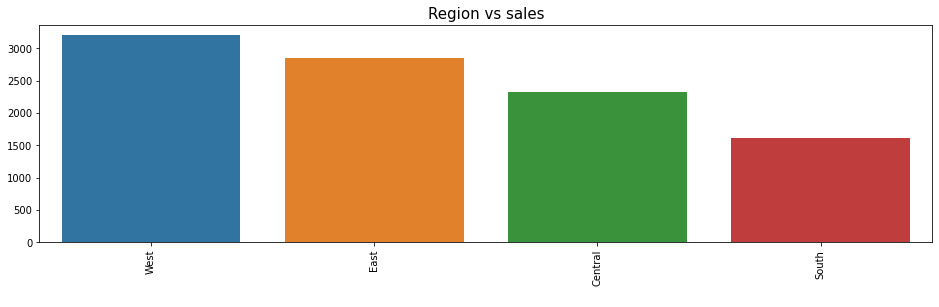

In [13]:
# The most country to purchase from the website
top_purchase = data.groupby('Region')['Quantity'].count().sort_values(ascending=False)[:10]

plt.figure(figsize=(16,4))
sns.barplot(x=top_purchase.index, y=top_purchase.values)
plt.xticks(rotation=90)
plt.title("Region vs sales", size=15)
plt.xlabel(" ")
plt.show()

This unvalidated the hypothesis which said the south has most sales. The west performed battet overall. 

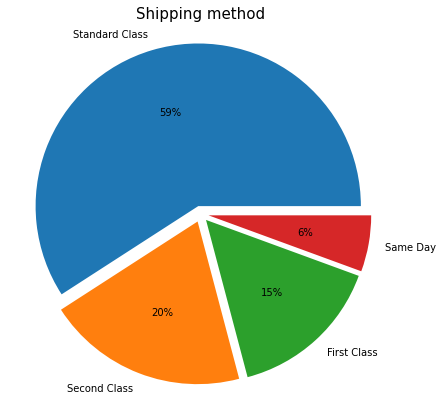

In [14]:
# Top shiping mode vs sales
top_country = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False)[:10]
labels = top_country[:5].index
size = top_country[:5].values
plt.figure(figsize=(7,7))
plt.pie(size, labels=labels, explode=[0.05]*(len(size)), autopct='%1.0f%%')
plt.title("Shipping method ", size=15)
plt.axis('equal')
plt.show()

As Hypothesised the stansdatd shiping has the most methos of shipment.

In [15]:
data['Hour'] = df['Order Date'].dt.hour
data['Week'] = df['Order Date'].dt.week
data['Weekday'] = df['Order Date'].dt.weekday
data['WeekdayName'] = df['Order Date'].dt.day_name()
data['Month'] = df['Order Date'].dt.month
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Hour,Week,Weekday,WeekdayName,Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,0,45,1,Tuesday,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,0,45,1,Tuesday,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714,0,23,6,Sunday,6


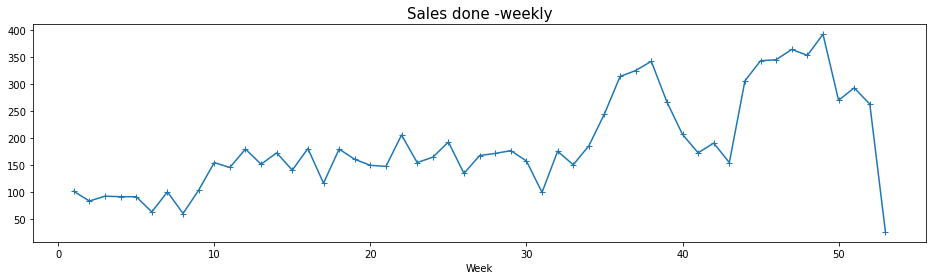

In [16]:
# Sales trend across week
month = data.groupby('Week')['Quantity'].count()
plt.figure(figsize=(16,4))
month.plot(marker='+')
plt.title("Sales done -weekly", size=15)
plt.show()

The last weeks of the year have the best sales

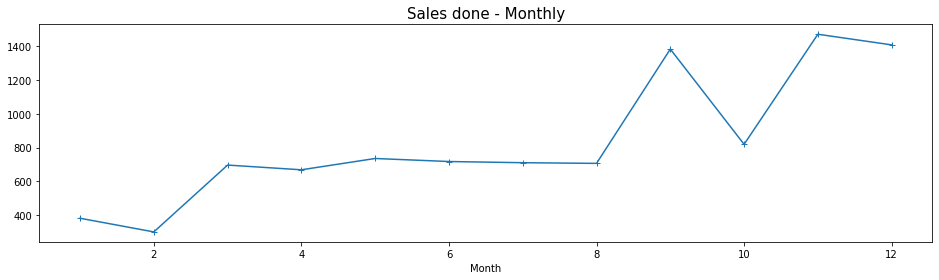

In [17]:
# Sales trend across months
month = data.groupby('Month')['Quantity'].count()
plt.figure(figsize=(16,4))
month.plot(marker='+')
plt.title("Sales done - Monthly", size=15)
plt.show()


Monthly trend makes a revealation that the number of sales in the platform is increasing. Further, the rate of increase stayed flat till August 2011 and rapidly increasing from September 2011.
The sudden dip in the month of December is because we have only data till December 9th.

## RFM modeling

In [18]:
#group the data by customer name, creat new columns Order date, the 
rfmTable = df.groupby('Customer Name').agg({'Order Date': lambda x: (x.max() - x.min()).days, # Recency
                                        'Order ID': lambda x: len(x),      # Frequency
                                        'Sales': lambda x: x.sum()})        # Monetary Value



In [19]:
#Change col names of our new table 
rfmTable['Order Date'] = rfmTable['Order Date'].astype(int)
rfmTable.rename(columns={'Order Date': 'Recency', 
                         'Order ID': 'Frequency', 
                         'Sales': 'MoneyValue'}, inplace=True)

In [20]:
#Quick visual of a few records
rfmTable.head()

,Recency,Frequency,MoneyValue
Customer Name,,,
Aaron Bergman,996,6,886.156
Aaron Hawkins,1336,11,1744.700
Aaron Smayling,1164,10,3050.692
Adam Bellavance,780,18,7755.620
Adam Hart,1106,20,3250.337


Percentage of one time buuyers 0.0 %


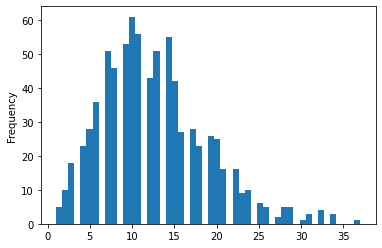

In [21]:
#visualize the frequency

rfmTable['Frequency'].plot(kind= 'hist', bins =50)
rfmTable['Frequency'].describe()
oneTimecustomers = round(sum(rfmTable['Frequency']== 0)/float(len(rfmTable))*(100),2)
print("Percentage of one time buuyers", oneTimecustomers, "%")

### The result is quite interesting as most of the customers are repeat customers

In [22]:
#Quick look at customer name, view history of purchase
Cust1 = df[df['Customer Name']=='Claire Gute']
Cust1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
5491,5492,CA-2017-164098,2017-01-26,2017-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,77070,Central,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",18.160,2,0.2,1.8160
6877,6878,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,75217,Central,FUR-FU-10004952,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder w/...,131.376,6,0.6,-95.2476
6878,6879,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,75217,Central,OFF-PA-10003001,Office Supplies,Paper,Xerox 1986,5.344,1,0.2,1.8704


In [23]:
Cust1.shape[0]

5

## Determining RFM Quartiles

In [24]:
#set the quatile values 
quant = rfmTable.quantile(q=[0.25,0.5,0.75])
#visualize the values
quant 

,Recency,Frequency,MoneyValue
0.25,829.0,8.0,1146.050
0.50,1092.0,12.0,2256.394
0.75,1222.0,16.0,3785.276


In [25]:
#copy to dictionary
quant = quant.to_dict()
#visualize once more
quant


{'Recency': {0.25: 829.0, 0.5: 1092.0, 0.75: 1222.0},
 'Frequency': {0.25: 8.0, 0.5: 12.0, 0.75: 16.0},
 'MoneyValue': {0.25: 1146.0500000000002, 0.5: 2256.394, 0.75: 3785.276}}

## Creating the RFM segmentation table

In [26]:
#Change variable name
rfmSeg = rfmTable

In [27]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [28]:
# 
rfmSeg['R_Quartile'] = rfmSeg['Recency'].apply(RClass, args=('Recency',quant,))
rfmSeg['F_Quartile'] = rfmSeg['Frequency'].apply(FMClass, args=('Frequency',quant,))
rfmSeg['M_Quartile'] = rfmSeg['MoneyValue'].apply(FMClass, args=('MoneyValue',quant,))

In [29]:
#The rfm class is combination of the string values
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [30]:
#Try to arrange numerically
rfmSeg.sort_values(by=['RFMClass'])

,Recency,Frequency,MoneyValue,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer Name,,,,,,,
Dan Reichenbach,824,24,6528.034,1,1,1,111
Helen Wasserman,708,20,9300.254,1,1,1,111
Adam Bellavance,780,18,7755.620,1,1,1,111
Sanjit Jacobs,735,24,3949.656,1,1,1,111
Mick Hernandez,489,22,5503.093,1,1,1,111
...,...,...,...,...,...,...,...
Allen Goldenen,1237,8,200.945,4,4,4,444
Eric Barreto,1266,7,944.600,4,4,4,444
Beth Fritzler,1322,4,791.990,4,4,4,444


In [32]:
#create a score based on the sum of the RFMclass values
rfmSeg["Score"] = rfmSeg[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)
rfmSeg.head()

,Recency,Frequency,MoneyValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,Score
Customer Name,,,,,,,,
Aaron Bergman,996,6,886.156,2,4,4,244,10
Aaron Hawkins,1336,11,1744.700,4,3,3,433,10
Aaron Smayling,1164,10,3050.692,3,3,2,332,8
Adam Bellavance,780,18,7755.620,1,1,1,111,3
Adam Hart,1106,20,3250.337,3,1,2,312,6



From the RFMClass column it can be clear that the three digit numbers are the representing three values of the RFM scale. 
from businesss perspective.

We can assign Loyaltylevel to the score. 

In [33]:
# Group the scores into Loyalty levels
loyalty = ['Bronze', 'Silver', 'Gold', 'Platinum']
rfmSeg['Loyalty_Level'] = pd.qcut(rfmSeg['Score'], q=4, labels= loyalty)
rfmSeg.head()

,Recency,Frequency,MoneyValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,Score,Loyalty_Level
Customer Name,,,,,,,,,
Aaron Bergman,996,6,886.156,2,4,4,244,10,Platinum
Aaron Hawkins,1336,11,1744.700,4,3,3,433,10,Platinum
Aaron Smayling,1164,10,3050.692,3,3,2,332,8,Silver
Adam Bellavance,780,18,7755.620,1,1,1,111,3,Bronze
Adam Hart,1106,20,3250.337,3,1,2,312,6,Bronze


# Conclusion
RFM is a data-driven customer segmentation technique that allows marketers to make informed decisions. It empowers marketers to quickly identify and segment users into homogeneous groups and target them with personalized marketing strategies. This, in turn, improves user engagement and retention. In this project, I have used equally weighted RFM values to derive the score. However, this is usually done based on the nature of the business. 
So business-like Streaming, Retail, durables, building - the strategy will be different. 
Streaming- High recency, high frequency, low monetary value (Streamers come daily, and in a day can be in twice )
Retails- High recency, high frequency, then a monetary value. (Buyers weekly, monthly, twice a week)
construction - Will have higher monetary value, then low recency and frequency. 

Thanks for your time to read this article I hope the RFM model is clear, that you can perform segmentation of customer data set on your own. 